# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Create Virtual Enviroment 

a. Created virtual environment called "capstone-flask"

Hal pertama yang harus dilakukan adalah melakukan pengaturan environment conda. Untuk menyiapkan conda environment dan kernel, silahkan gunakan command berikut:

```
conda create -n <ENV_NAME> python=3.10
conda activate <ENV_NAME>

conda install ipykernel
python -m ipykernel install --user --name <ENV_NAME>
```

b. Install packages: pandas, flask, matplotlib, dan numpy

Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages, Anda dapat menggunakan perintah berikut:

```
pip install -r requirements.txt --user
```

## Data Preprocessing

**Import library**

In [109]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [110]:
playstore = pd.read_csv("data/googleplaystore.csv")
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [111]:
playstore.drop_duplicates(subset = 'App', keep='first',inplace=True)

Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [112]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [113]:
playstore.Category = playstore.Category.astype('category')

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [114]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
playstore.Installs =playstore.Installs.apply(lambda x: x.replace('+',''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',',''))

In [116]:
playstore['Installs']=playstore.Installs.astype('int64')

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [117]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [118]:
playstore.Price= playstore.Price.apply(lambda x: x.replace('$',''))
playstore['Price'] = playstore.Price.astype('float')

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [119]:
playstore.Reviews=playstore.Reviews.astype('int64')

In [120]:
playstore.Size=playstore.Size.astype('int64')

In [121]:
playstore.Installs=playstore.Installs.astype('int64')

## Data Wrangling

In [125]:
df2 = playstore.copy()

**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [143]:
top_category=pd.crosstab(
    index=df2['Category'],
    columns='Jumlah', 
).sort_values('Jumlah',ascending=False)
top_category

col_0,Jumlah
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [133]:
pd.crosstab(index=playstore['sub_category'], columns=household['format'])top_category = top_category.crosstab()

SyntaxError: invalid syntax (334006822.py, line 1)

In [145]:
top_category.head()

col_0,Jumlah
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [148]:
most_categories=top_category ['Jumlah'].head(1)
most_categories

Category
FAMILY    1832
Name: Jumlah, dtype: int64

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [158]:
 rev_table = pd.DataFrame({
    'Category': ['Social', 'Communication', 'Social', 'Tools', 'Productivity',
                 'Game', 'Social', 'Game', 'Social', 'Game'],
    'App': ['Facebook', 'WhatsApp Messenger', 'Instagram', 'Google Drive', 'Microsoft Word',
            'Subway Surfers', 'Facebook Lite', 'Candy Crush Saga', 'Snapchat', 'Clash of Clans'],
    'Reviews': [78158306, 69119316, 66577446, 59064087, 58347731,
                27722264, 25655305, 22426677, 20364716, 20313533],
    'Rating': [4.0, 4.3, 4.5, 4.4, 4.5,
               4.5, 4.2, 4.6, 4.0, 4.6]
})
rev_table

,Category,App,Reviews,Rating
0,Social,Facebook,78158306,4.0
1,Communication,WhatsApp Messenger,69119316,4.3
2,Social,Instagram,66577446,4.5
3,Tools,Google Drive,59064087,4.4
4,Productivity,Microsoft Word,58347731,4.5
5,Game,Subway Surfers,27722264,4.5
6,Social,Facebook Lite,25655305,4.2
7,Game,Candy Crush Saga,22426677,4.6
8,Social,Snapchat,20364716,4.0
9,Game,Clash of Clans,20313533,4.6


In [162]:
rev_agg = rev_table.groupby(['App', 'Category'], as_index=False).agg({'Reviews': 'sum', 'Rating': 'mean'})
rev_agg_sorted = rev_agg.sort_values(by='Reviews', ascending=False)

In [15]:
rev_table = __________

Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [160]:
rev_table

,Category,App,Reviews,Rating
0,Social,Facebook,78158306,4.0
1,Communication,WhatsApp Messenger,69119316,4.3
2,Social,Instagram,66577446,4.5
3,Tools,Google Drive,59064087,4.4
4,Productivity,Microsoft Word,58347731,4.5
5,Game,Subway Surfers,27722264,4.5
6,Social,Facebook Lite,25655305,4.2
7,Game,Candy Crush Saga,22426677,4.6
8,Social,Snapchat,20364716,4.0
9,Game,Clash of Clans,20313533,4.6


## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

,Total
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


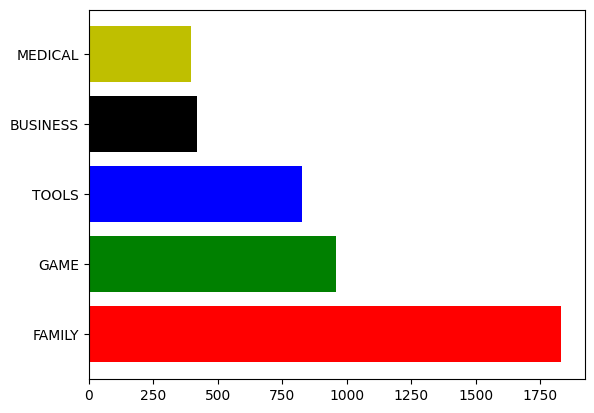

In [178]:
cat_order = df2.groupby('Category').agg({
'App' : 'count'
}).rename({'App':'Total'}, axis=1).sort_values('Total', ascending=False).head()
X = cat_order.index.tolist()
Y = cat_order['Total'].tolist()
my_colors = ['r','g','b','k','y','m','c']
plt.barh(X,Y, color=my_colors)

cat_order

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

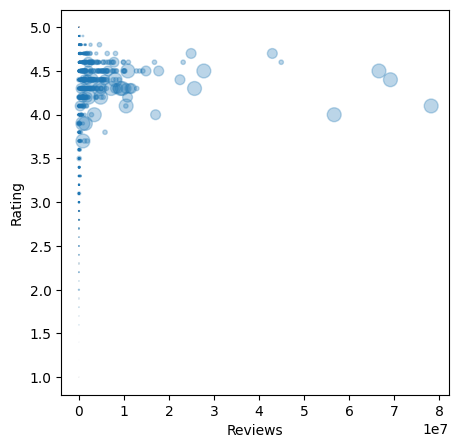

In [179]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X, y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

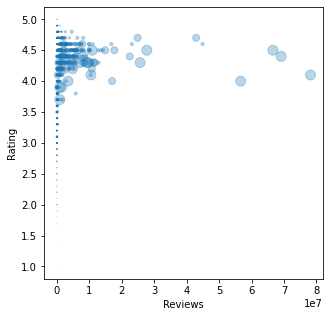

In [19]:
X = df2[______].values # axis x
Y = df2[______].values # axis y
area = playstore[_______].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt._______(x=_____,y=______, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

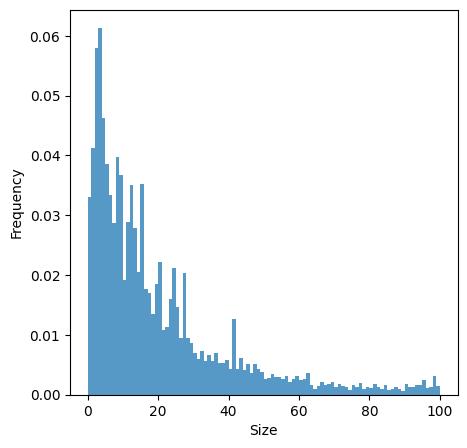

In [180]:
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True, alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [21]:
## code here


